In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from model import YomiModel

In [50]:
models = dict(
    skill_mult_with_char_skill=YomiModel(
        "skill_mult_player_tournament_part_pooled_char_skill.stan",
        [
            'skill', 'mu', 'muv', 'player_skill', 'baseline_skill',
            'tournament_variance', 'player_variance', 'log_lik', 'win_hat',
            'char_skill',
        ]
    ),
    skill_mult_pooled=YomiModel(
        "skill_mult_player_tournament_part_pooled.stan",
        [
            'skill', 'mu', 'muv', 'player_skill', 'baseline_skill',
            'tournament_variance', 'player_variance', 'log_lik', 'win_hat',
        ]
    ),
    skill_mult=YomiModel(
        "skill_mult_player_tournament.stan",
        [
            'skill', 'mu', 'muv', 'log_lik', 'win_hat',
        ]
    ),
    player_tournament_only=YomiModel(
        "player_tournament.stan",
        [
            'skill', 'mu', 'log_lik', 'win_hat',
        ]
    ),
    char_skill_only=YomiModel(
        "char_skill_only.stan",
        [
            'char_skill', 'mu', 'log_lik', 'win_hat',
        ]                      
    ),
    player_tournament_pooled=YomiModel(
        "player_tournament_part_pool.stan",
        [
            'skill', 'mu', 'player_skill', 'raw_player_skill', 'raw_skill', 'baseline_skill', 'tournament_variance', 'player_variance',
            'log_lik', 'win_hat',
        ]                      
    ),
    player_tournament_min_pooled=YomiModel(
        "player_tournament_min_pool.stan",
        [
            'skill', 'mu', 'player_skill', 'global_player_skill', 'player_variance', 'tournament_variance', 'skill_in_tournament',
            'log_lik', 'win_hat',
        ]                      
    ),
    player_tournament_pooled_char_skill=YomiModel(
        "player_tournament_part_pool_char_skill.stan",
        [
            'skill', 'char_skill', 'mu', 'player_skill', 'baseline_skill', 'tournament_variance', 'player_variance',
            'log_lik', 'win_hat',
        ]                      
    ),
#     player_tournament_char_skill=YomiModel(
#         "player_tournament_char_skill.stan",
#         [
#             'skill', 'char_skill', 'mu', 'log_lik', 'win_hat',
#         ]                      
#     )
)

In [51]:
import arviz
arviz.compare(
    dataset_dict={
        name: model.sample_infdata(warmup=1500, min_samples=2000)
        for name, model
        in models.items()
    },
    ic='loo',
)

/usr/local/lib/python3.7/site-packages/arviz/stats/stats.py:401: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for
        one or more samples. You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal posterior and LOO posterior
        are very different. This is more likely to happen with a non-robust model and highly
        influential observations.
  influential observations."""
/usr/local/lib/python3.7/site-packages/arviz/stats/stats.py:401: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for
        one or more samples. You should consider using a more robust model, this is because
        importance sampling is less likely to work well if the marginal posterior and LOO posterior
        are very different. This is more likely to happen with a non-robust model and highly
        influential observations.
  influential observations.""

,loo,ploo,dloo,weight,se,dse,warning
player_tournament_pooled,29029.1,492.002,0,2.86548e-13,63.7121,0,0
player_tournament_min_pooled,29029.3,487.459,0.192899,0.305182,63.6972,1.16676,0
skill_mult_pooled,29059.7,631.208,30.6064,0.151926,63.1017,20.438,1
skill_mult,29169.6,957.11,140.463,0,73.7185,39.1306,1
skill_mult_with_char_skill,29195.1,1031.02,165.97,0.213409,70.1154,38.3356,1
player_tournament_only,29383.9,1545.87,354.787,0.329484,100.453,62.8323,0
player_tournament_pooled_char_skill,29675.9,1509.91,646.806,0,87.2908,54.643,0
char_skill_only,29708.4,1331.5,679.297,0,85.7122,55.5822,0


In [53]:
from render import *

render = YomiRender(models['skill_mult_pooled'], 1500, 2000)
players = [
    'vengefulpickle',
    'mysticjuicer',
    'cpat',
    'CKR',
    'Bomber678',
    'snoc',
    'thehug0naut',
    'Fluffiness',
    'Hobusu',
    'Niijima-San',
]
render.render_player_skills(*players)
render.render_raw_player_skills(*players)

INFO:root:Dataframe loading failed
Traceback (most recent call last):
  File "/code/model.py", line 229, in dataframe
    fit_results = pandas.DataFrame.from_csv(self.csv_filename)
  File "/usr/local/lib/python3.7/site-packages/pandas/core/frame.py", line 1579, in from_csv
    infer_datetime_format=infer_datetime_format)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 1708, in __init__
    self._reader = par

Unpickled successfully StanModel object 'anon_model_c2f5f88aec62108d51ba83a4d4d51530' coded as follows:
data {
    int<lower=0> NPT; // Number of player/tournaments
    int<lower=0> NG; // Number of games
    int<lower=0> NM; // Number of matchups
    int<lower=0> NP; // Number of players

    int<lower=0, upper=NPT> prev_tournament[NPT]; // Previous tournament for player/tournament

    int<lower=1, upper=NP> tp[NPT]; // Player n game

    int<lower=0, upper=1> win[NG]; // Did player 1 win game
    int<lower=1, upper=NPT> pt1[NG]; // Player/tournament 1 in game
    int<lower=1, upper=NPT> pt2[NG]; // Player/tournament 2 in game
    int<lower=1, upper=NM> mup[NG]; // Matchup in game
    vector<lower=0, upper=1>[NG] non_mirror; // Is this a mirror matchup: 0 = mirror

}
parameters {
    vector[NPT] raw_skill; // Skill change before player/tournament
    vector[NM] mu; // Matchup value
    vector<lower=0>[NM] muv; // Matchup skill multiplier
    real baseline_skill; // Average baseline p

INFO:root:Dataframe loading failed
Traceback (most recent call last):
  File "/code/model.py", line 229, in dataframe
    fit_results = pandas.DataFrame.from_csv(self.csv_filename)
  File "/usr/local/lib/python3.7/site-packages/pandas/core/frame.py", line 1579, in from_csv
    infer_datetime_format=infer_datetime_format)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 440, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 787, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 1014, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.7/site-packages/pandas/io/parsers.py", line 1708, in __init__
    self._reader = par

[], Categories (0, object): []

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 0.0 x 2 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: vengefulpickle-raw-skill-c2f5f88aec62108d51ba83a4d4d51530-33d8b5a11351670c77e81ea471aa62ef.png
  warn('Filename: {}'.format(filename))


PlotnineError: 'Width not defined. Set with `position_dodge(width = ?)`'

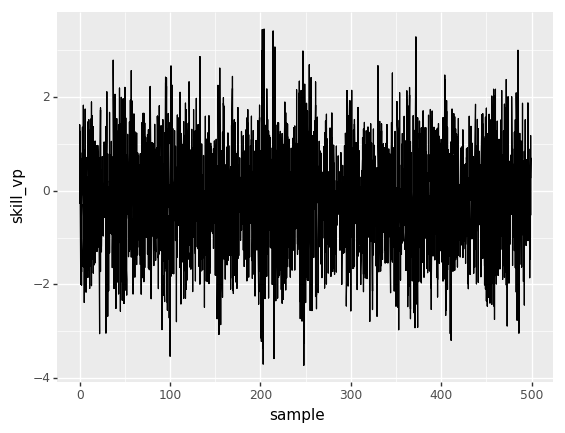

<ggplot: (8757741211382)>

In [22]:
from plotnine import *
vp = render.player_tournament_skill[render.player_tournament_skill.player == 'vengefulpickle'].set_index(['tournament', 'sample'])
mj = render.player_tournament_skill[render.player_tournament_skill.player == 'ArthurWynne'].set_index(['tournament', 'sample'])

df = vp.join(mj.skill, rsuffix='_mj', lsuffix='_vp')[['skill_vp', 'skill_mj']].reset_index()

(
    ggplot(df, aes(x='sample', y='skill_vp'))
    + geom_line()
)

In [5]:
import pystan

for chain, sample in enumerate(models['skill_mult_with_char_skill']._samples(warmup=1500, min_samples=2000)):
    print(chain, pystan.diagnostics.check_rhat(sample.fit))

0 True


1 False
2 True
3 True


In [23]:
pystan.diagnostics.check_n_eff(fit, verbose=2)

INFO:pystan:n_eff / iter looks reasonable for all parameters


True

In [ ]:
arviz.plot_ppc(inf_data, alpha=0.3, kind='cumulative', figsize=(12, 6), textsize=14)

In [54]:
fit_results = models['player_tournament_min_pooled'].sample_dataframe(1500, 2000)

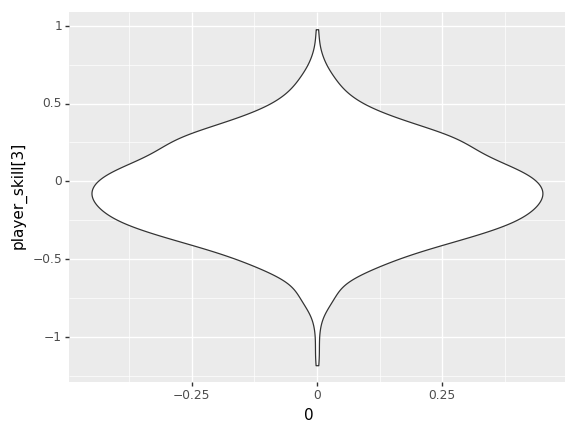

<ggplot: (-9223363279108007992)>

In [55]:
(
    ggplot(fit_results, aes(x='0', y='player_skill[3]'))
    + geom_violin()
)

In [56]:
mu_index = models['player_tournament_min_pooled'].mu_index

In [57]:
matchups = fit_results[[col for col in fit_results.columns if col.startswith('mu[')]].rename(
    columns={'mu[{}]'.format(ix): "{.value}-{.value}".format(c1, c2) for ((c1, c2), ix) in mu_index.items()}
).unstack().rename('win_rate').reset_index()
matchups['c1'] = matchups.level_0.apply(lambda x: Character(x.split('-')[0])).astype(character_category)
matchups['c2'] = matchups.level_0.apply(lambda x: Character(x.split('-')[1])).astype(character_category)
matchups['win_rate'] = pandas.to_numeric(matchups['win_rate'])
del(matchups['level_0'])
matchups = matchups.rename(columns={'level_1': 'sample'})

In [58]:
matchups.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420000 entries, 0 to 419999
Data columns (total 4 columns):
sample      420000 non-null int64
win_rate    420000 non-null float64
c1          420000 non-null category
c2          420000 non-null category
dtypes: category(2), float64(1), int64(1)
memory usage: 7.2 MB


In [59]:
flipped = matchups[matchups.c1 != matchups.c2].rename(columns={'c1': 'c2', 'c2': 'c1'})
flipped['win_rate'] = -flipped['win_rate']

matchups = matchups.append(flipped)
del(flipped)

In [60]:
matchups.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 417999
Data columns (total 4 columns):
c1          800000 non-null category
c2          800000 non-null category
sample      800000 non-null int64
win_rate    800000 non-null float64
dtypes: category(2), float64(1), int64(1)
memory usage: 19.8 MB


In [61]:
import math

matchups['win_rate'] = pandas.to_numeric(10*(matchups['win_rate'].rpow(math.e)) / (1 + matchups['win_rate'].rpow(math.e)))

median_rates = pandas.to_numeric(matchups.groupby(['c1', 'c2']).win_rate.median().rename('median_win_rate'))
text_color = median_rates.reset_index().median_win_rate.apply(lambda x: 'white' if x > 6 or x < 4 else 'black')

matchups = matchups.join(median_rates, on=['c1', 'c2'])

In [62]:
matchups.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 417999
Data columns (total 5 columns):
c1                 800000 non-null category
c2                 800000 non-null category
sample             800000 non-null int64
win_rate           800000 non-null float64
median_win_rate    800000 non-null float64
dtypes: category(2), float64(2), int64(1)
memory usage: 25.9 MB


In [63]:
num_samples = matchups['sample'].nunique()
df = matchups[matchups.c1 < matchups.c2]
too_bad_samples = df[df.win_rate < 5].groupby(['c1', 'c2']).size()
too_good_samples = df[df.win_rate > 5].groupby(['c1', 'c2']).size()
lopsided_fraction = (too_bad_samples - too_good_samples).abs()/num_samples
lopsided_fraction.sort_values()

c1          c2        
Midori      Onimaru       0.004
            Troq          0.020
            Setsuki       0.040
Rook        Valerie       0.084
Grave       Menelker      0.088
Quince      Setsuki       0.128
Argagarg    Geiger        0.216
Jaina       Quince        0.220
Geiger      Persephone    0.244
BBB         Menelker      0.256
Rook        Vendetta      0.368
Geiger      Gwen          0.408
DeGrey      Geiger        0.432
Gloria      Lum           0.444
Argagarg    Troq          0.448
Rook        Troq          0.456
Persephone  Rook          0.516
Gloria      Onimaru       0.540
Lum         Midori        0.580
Menelker    Midori        0.584
Geiger      Menelker      0.596
Onimaru     Zane          0.620
Quince      Vendetta      0.676
Lum         Menelker      0.708
Setsuki     Valerie       0.768
Lum         Troq          0.780
Argagarg    Vendetta      0.804
Gloria      Valerie       0.856
Grave       Onimaru       0.868
Menelker    Persephone    0.888
                 

In [67]:
from IPython.core.display import display
from plotnine import *

model_hash = models['player_tournament_min_pooled'].model_hash
data_hash = models['player_tournament_min_pooled'].data_hash

matchup_chart = (
    ggplot(matchups, aes(x='0', y='win_rate', fill='median_win_rate'))
    + geom_violin()
    + geom_text(
        data=median_rates.reset_index(),
        mapping=aes(label='median_win_rate', y='median_win_rate', x=0, size=9),
        color=text_color,
        format_string='{:.2}',
    )
    + facet_grid('c1 ~ c2')
    + coord_flip()
    + theme(figure_size=(25, 15))
    + scale_fill_gradient2(midpoint=5)
)

filename = f'yomi-matchup-estimates-{model_hash}-{data_hash}.png'
matchup_chart.save(filename)

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 25 x 15 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: yomi-matchup-estimates-3c55c282fca23373ca5c2aa2755a1c6e-33d8b5a11351670c77e81ea471aa62ef.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/usr/local/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


In [ ]:
matchups.info(memory_usage='deep')

In [ ]:
std_devs = fit_results[[
    col for col in fit_results.columns
    if col.startswith('muv[') or col.startswith('mmv[')
]].rename(
    columns={'muv[{}]'.format(ix): "{.value}-{.value}".format(c1, c2) for ((c1, c2), ix) in mu_index.items()}
).rename(
    columns={'mmv[{}]'.format(ix): "{.value}-{.value}".format(c1, c1) for (c1, ix) in mirror_index.items()}
).unstack().rename('std_dev').reset_index()
std_devs['c1'] = std_devs.level_0.apply(lambda x: Character(x.split('-')[0])).astype(character_category)
std_devs['c2'] = std_devs.level_0.apply(lambda x: Character(x.split('-')[1])).astype(character_category)
del(std_devs['level_0'])
std_devs = std_devs.rename(columns={'level_1': 'sample'})

In [ ]:
std_devs.info(memory_usage='deep')

In [ ]:
flipped = std_devs[std_devs.c1 != std_devs.c2].rename(columns={'c1': 'c2', 'c2': 'c1'})

std_devs = std_devs.append(flipped)

In [ ]:
std_devs.info(memory_usage='deep')

In [ ]:
import math
#std_devs['std_dev'] = 10*(std_devs['std_dev'].rpow(math.e)) / (1 + std_devs['std_dev'].rpow(math.e))-5

median_rates = pandas.DataFrame(std_devs.groupby(['c1', 'c2']).std_dev.median().rename('median_std_dev'))
text_color = median_rates.reset_index().median_std_dev.apply(lambda x: 'white' if x < 1 else 'black')

std_devs = std_devs.join(median_rates, on=['c1', 'c2'])

In [ ]:
std_devs.info(memory_usage='deep')

In [ ]:
from plotnine import *
from IPython.core.display import display

std_dev_chart = (
    ggplot(std_devs, aes(x='0', y='std_dev', fill='median_std_dev'))
    + geom_violin()
    + geom_text(
        data=median_rates.reset_index(),
        mapping=aes(label='median_std_dev', x=.4, y=2, size=9),
        #color=text_color,
        format_string='median={:.2}',
    )
    + facet_grid('c1 ~ c2')
    + coord_flip()
    + theme(figure_size=(25, 15))
    + scale_fill_gradient2(midpoint=1)
)

filename = f'yomi-std-dev-estimates-{model_hash}-{data_hash}.png'
std_dev_chart.save(filename)

In [ ]:
(
    ggplot(std_devs.sample(frac=0.01), aes(x='0', y='std_dev', fill='median_std_dev'))
    + geom_violin()
    + facet_wrap('c1')
    + coord_flip()
    + theme(figure_size=(5, 5))
    + scale_fill_gradient2(midpoint=1)
).save(f'skill-effects-character-{model_hash}-{data_hash}.png')

In [66]:
render_player, render_players = player_skill(models['skill_mult_with_char_skill'], 1500, 2000)

/code/model.py:236: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  for par in self.model.pars:


In [67]:
render_players(
    'vengefulpickle',
    'mysticjuicer',
    'cpat',
    'CKR',
    'Bomber678',
    'snoc',
    'thehug0naut',
    'Fluffiness',
    'Hobusu',
    'Niijima-San'
)

/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 2.8000000000000003 x 2 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: vengefulpickle-skill-0e616ebc420f950e4369c25013121552-4fed4f11ebcd2678ee1d7278d87eb650.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4.0 x 2 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: vengefulpickle-char-skill-0e616ebc420f950e4369c25013121552-4fed4f11ebcd2678ee1d7278d87eb650.png
  warn('Filename: {}'.format(filename))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 9.8 x 2 in image.
  from_inches(height, units), units))
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: mysticjuicer-skill-0e616ebc420f950e4369c250

In [ ]:
iyl6 = player_tournament_skill[player_tournament_skill.tournament=='IYL Season 6'].copy()

iyl_player_list = iyl6.groupby('player').skill.median().sort_values().index.tolist()
iyl6['player'] = iyl6['player'].astype('category').cat.reorder_categories(iyl_player_list, ordered=True)

plot = (
    ggplot(iyl6, aes(x='player', y='skill'))
    + geom_violin()
    + theme(
        figure_size=(10, 10),
    )
    + coord_flip()
)
plot.save(f'iyl6-{model_hash}-{data_hash}.png')

In [ ]:
num_samples = player_tournament_skill['sample'].nunique()
skill_subsample = pandas.cut(
    player_tournament_skill.set_index(['tournament', 'player']).skill,
    bins=[x-0.5 for x in range(-9, 9)],
    precision=0,
).rename('skill').reset_index().groupby(
    ['tournament', 'player', 'skill']
).size().rename('skill_fraction').reset_index(['skill'])

skill_subsample['skill_fraction'] /= num_samples

game_skill = games.join(
    skill_subsample.rename(columns={'skill': 'skill_1', 'skill_fraction': 'skill_fraction_1'}),
    on=('tournament_name', 'player_1')
).join(
    skill_subsample.rename(columns={'skill': 'skill_2', 'skill_fraction': 'skill_fraction_2'}),
    on=('tournament_name', 'player_2')
)

flipped = game_skill[game_skill.character_1 < game_skill.character_2]
flipped = flipped.rename(columns={
    'character_1': 'character_2',
    'character_2': 'character_1',
    'skill_1': 'skill_2',
    'skill_2': 'skill_1',
    'skill_fraction_1': 'skill_fraction_2',
    'skill_fraction_2': 'skill_fraction_1',
})
flipped['win'] = 1-flipped.win
game_skill = game_skill.append(flipped)

game_skill['skill_fraction'] = game_skill.skill_fraction_1 * game_skill.skill_fraction_2
game_skill['win_fraction'] = game_skill.win * game_skill.skill_fraction



In [ ]:
game_skill.info(memory_usage='deep')

In [ ]:
game_skill.groupby(['character_1', 'character_2', 'skill_1', 'skill_2']).sum().dropna().sort_values(by='win_fraction', ascending=False).head()

In [ ]:
import itertools
from plotnine import *

df = game_skill.groupby(
    ['character_1', 'character_2', 'skill_1', 'skill_2']
).sum().rename(columns={'skill_fraction': 'games_played', 'win_fraction': 'p1_wins'}).reset_index().dropna()
df['p1_win_prob'] = df.p1_wins / df.games_played
max_count = df['games_played'].max()
df['played_color'] = df.games_played.apply(lambda p: p > max_count*.8)
df['prob_color'] = df.p1_win_prob.apply(lambda p: not (.2 < p < .8))

df = df[df.games_played >= 0.05]

character_subsets = [list(Character)[x:x+4] for x in range(0, len(Character), 4)]

show_legends = False

for ((y, c1_subset), (x, c2_subset)) in itertools.product(enumerate(character_subsets), enumerate(character_subsets)):
    subset_selector = df.character_1.isin(c1_subset) & df.character_2.isin(c2_subset)
    
    tile_plot = (
        ggplot(
            df[subset_selector],
            aes(y='factor(skill_1)', x='factor(skill_2)')
        )
        + facet_grid('character_1 ~ character_2', labeller='label_both')
        + scale_color_grey(start=0, end=1, limits=[False, True])
        + labs(y='p1 skill', x='p2 skill')
    )
    
    (
        tile_plot
        + geom_tile(aes(fill='games_played'), show_legend=show_legends)
        + geom_text(
            aes(label='games_played', color='played_color'),
            size=7,
            format_string='{:.1f}',
            show_legend=show_legends,
        )
        + scale_fill_distiller(type='seq', limits=[0, max_count], palette='YlOrRd')
        + theme(
            figure_size=(15, 15),
            axis_text_x=element_text(rotation=90)
        )
    ).save(f'games-played-skill-{model_hash}-{data_hash}-{x}-{y}.png', limitsize=False, verbose=False)
    
    (
        tile_plot
        + geom_tile(aes(fill='p1_win_prob'), show_legend=show_legends)
        + geom_text(
            aes(label='p1_win_prob', color='prob_color'),
            size=7,
            format_string='{:.0%}',
            show_legend=show_legends,
        )
        + scale_fill_distiller(type='div', limits=[0, 1], palette='RdBu')
        + theme(
            figure_size=(15, 15),
            axis_text_x=element_text(rotation=90)
        )
    ).save(f'win-rate-skill-{model_hash}-{data_hash}-{x}-{y}.png', limitsize=False, verbose=False)


In [ ]:
from PIL import Image

num_tiles = len(Character) // 4

for prefix in ('win-rate-skill', 'games-played-skill'):
    tiles = {
        (x, y): Image.open(f'{prefix}-{model_hash}-{data_hash}-{x}-{y}.png')
        for x in range(num_tiles)
        for y in range(num_tiles)
    }
    (tile_width, tile_height) = tiles[(0, 0)].size
    dest_image = Image.new(tiles[(0, 0)].mode, (num_tiles * tile_width, num_tiles * tile_height))
    for ((x, y), tile) in tiles.items():
        dest_image.paste(tile, (x * tile_width, y * tile_height))
    dest_image.save(f'{prefix}-{model_hash}-{data_hash}.png')